### Poland Presidential Elections 2020 - 2nd round

Source: https://prezydent20200628.pkw.gov.pl/prezydent20200628/pl/dane_w_arkuszach

### Importing necessary packages

In [1]:
import pandas
import geopandas
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML

### Loading the data

In [2]:
df = pandas.read_csv("../data//2nd round/2wyniki_gl_na_kand_po_powiatach_proc_utf8.csv", delimiter=";", decimal=",")
df.head()

,Nr OKW,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,% głosów ważnych,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI,Liczba obwodów
0,2,20100,bolesławiecki,dolnośląskie,62.79,0.76,55.59,44.41,NaN,99.24,49.63,50.37,63
1,4,20200,dzierżoniowski,dolnośląskie,62.64,0.85,56.90,43.10,NaN,99.15,50.44,49.56,83
2,3,20300,głogowski,dolnośląskie,66.71,0.82,63.64,36.36,NaN,99.18,51.78,48.22,53
3,1,20400,górowski,dolnośląskie,59.29,0.87,49.28,50.72,NaN,99.13,57.00,43.00,23
4,2,20500,jaworski,dolnośląskie,62.72,0.97,56.25,43.75,NaN,99.03,54.44,45.56,39


I'll drop irrelevant columns.

In [3]:
df = df.drop(df.columns[[0,6,7,8,9,12]], axis=1)
df.head()

,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI
0,20100,bolesławiecki,dolnośląskie,62.79,0.76,49.63,50.37
1,20200,dzierżoniowski,dolnośląskie,62.64,0.85,50.44,49.56
2,20300,głogowski,dolnośląskie,66.71,0.82,51.78,48.22
3,20400,górowski,dolnośląskie,59.29,0.87,57.00,43.00
4,20500,jaworski,dolnośląskie,62.72,0.97,54.44,45.56


### Loading the geodata

In [4]:
powiat_df = geopandas.read_file(r"../subdivision shapes/Powiaty/Powiaty.shp", encoding="utf-8")
woj_df = geopandas.read_file(r"../subdivision shapes/Wojewodztwa/Województwa.shp", encoding="utf-8")

I'll modify *KOD_TERYT* of *df* to conform to the territorial code as it exists in column *JPT_KOD_JE* of shape file dataframe. This includes stripping last two digits and adding a leading 0 in front of 3-digit codes.

In [5]:
df["Kod TERYT"] = df["Kod TERYT"].astype(str).str[:-2]
df["Kod TERYT"] = df["Kod TERYT"].apply(lambda x: '0' + x if len(x) == 3 else x)

In [6]:
df.head()

,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI
0,0201,bolesławiecki,dolnośląskie,62.79,0.76,49.63,50.37
1,0202,dzierżoniowski,dolnośląskie,62.64,0.85,50.44,49.56
2,0203,głogowski,dolnośląskie,66.71,0.82,51.78,48.22
3,0204,górowski,dolnośląskie,59.29,0.87,57.00,43.00
4,0205,jaworski,dolnośląskie,62.72,0.97,54.44,45.56


I'll save this dataframe to an Excel spreadsheet for use in Power BI.

In [7]:
df.to_excel("../data/elections2020_2nd_round.xlsx")

Merging the geodata with the dataframe containing the votes.

In [8]:
merged_df = powiat_df.set_index("JPT_KOD_JE").join(df.set_index("Kod TERYT"))
merged_df.head()

,JPT_NAZWA_,geometry,Powiat,Województwo,Frekwencja,% głosów nieważnych,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI
JPT_KOD_JE,,,,,,,,
1807,powiat krośnieński,"POLYGON ((21.89480 49.78109, 21.88301 49.76796...",krośnieński,podkarpackie,66.99,0.82,74.11,25.89
2804,powiat elbląski,"POLYGON ((19.97906 54.13375, 19.98676 54.11915...",elbląski,warmińsko-mazurskie,57.25,0.76,50.22,49.78
1415,powiat ostrołęcki,"POLYGON ((21.55169 53.47813, 21.56589 53.48095...",ostrołęcki,mazowieckie,65.26,0.82,76.21,23.79
0413,powiat sępoleński,"POLYGON ((17.39065 53.49096, 17.39383 53.50781...",sępoleński,kujawsko-pomorskie,61.31,0.54,52.06,47.94
3019,powiat pilski,"POLYGON ((16.39053 53.13095, 16.39835 53.14838...",pilski,wielkopolskie,66.45,0.89,43.54,56.46


Let's see where turnout was the greatest.

In [9]:
display(HTML(df.nlargest(3, "Frekwencja").to_html(columns=['Województwo', 'Powiat', 'Frekwencja'], index=False)))

Województwo,Powiat,Frekwencja
mazowieckie,statki,99.74
mazowieckie,zagranica,79.67
pomorskie,pucki,78.38


Same story as with the previous round. The data contains votes cast on ships with frequency that would mess with the visualisation. I'll remove the first two rows.

In [10]:
df = df[df.Frekwencja < 79]
display(HTML(df.nlargest(3, "Frekwencja").to_html(columns=['Województwo', 'Powiat', 'Frekwencja'], index=False)))

Województwo,Powiat,Frekwencja
pomorskie,pucki,78.38
pomorskie,Sopot,77.59
mazowieckie,Warszawa,77.40


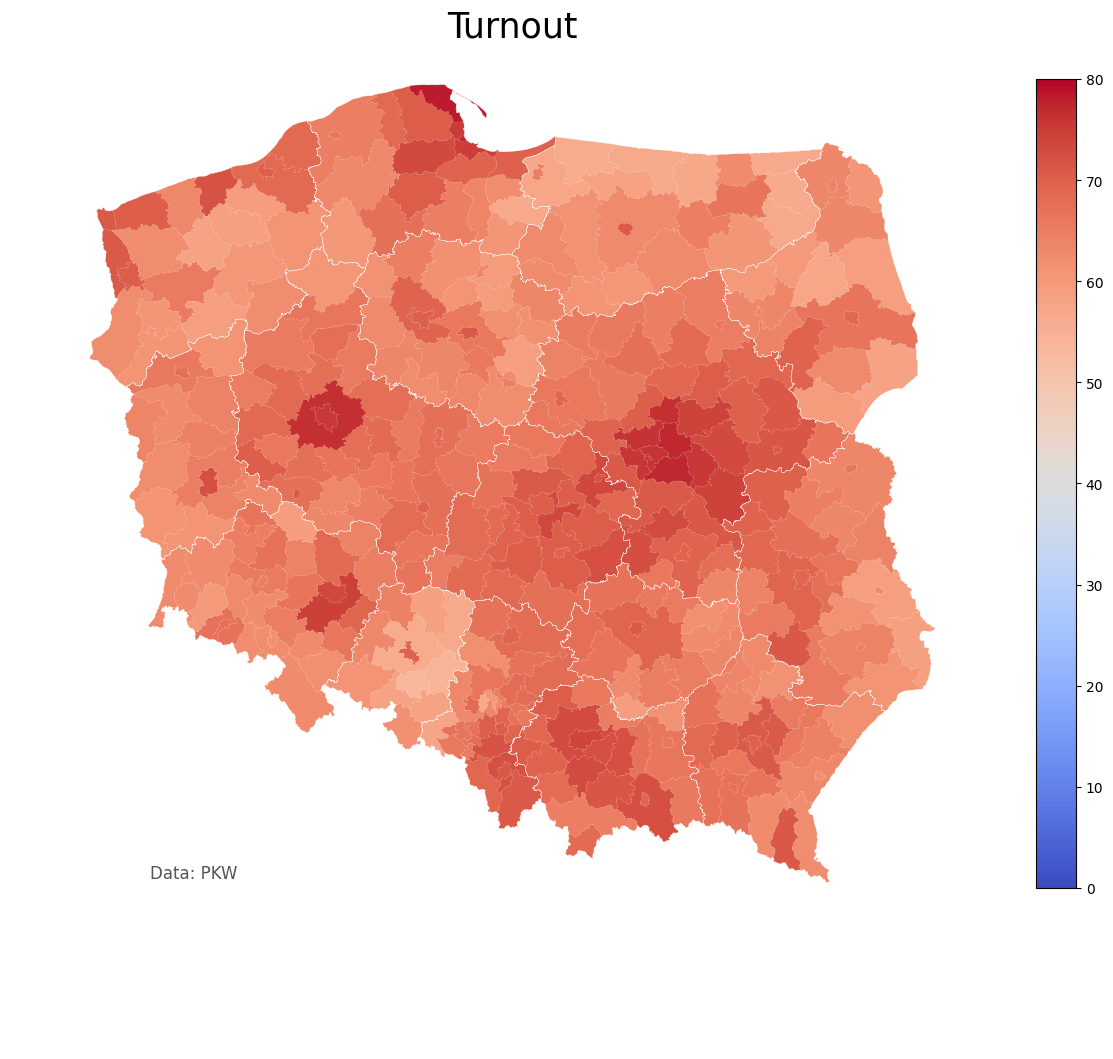

In [9]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Turnout", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="coolwarm",
                           norm=plt.Normalize(vmin=0,vmax=80))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Frekwencja", cmap="coolwarm", linewidth=0.1, ax=ax, vmin=0, vmax=80);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Turnout 2nd round", dpi=200, bbox_inches='tight')

In [10]:
display(HTML(df.nlargest(3, "% głosów nieważnych").to_html(columns=['Województwo', 'Powiat', '% głosów nieważnych'], index=False)))

Województwo,Powiat,% głosów nieważnych
łódzkie,skierniewicki,1.32
wielkopolskie,wolsztyński,1.15
małopolskie,brzeski,1.14


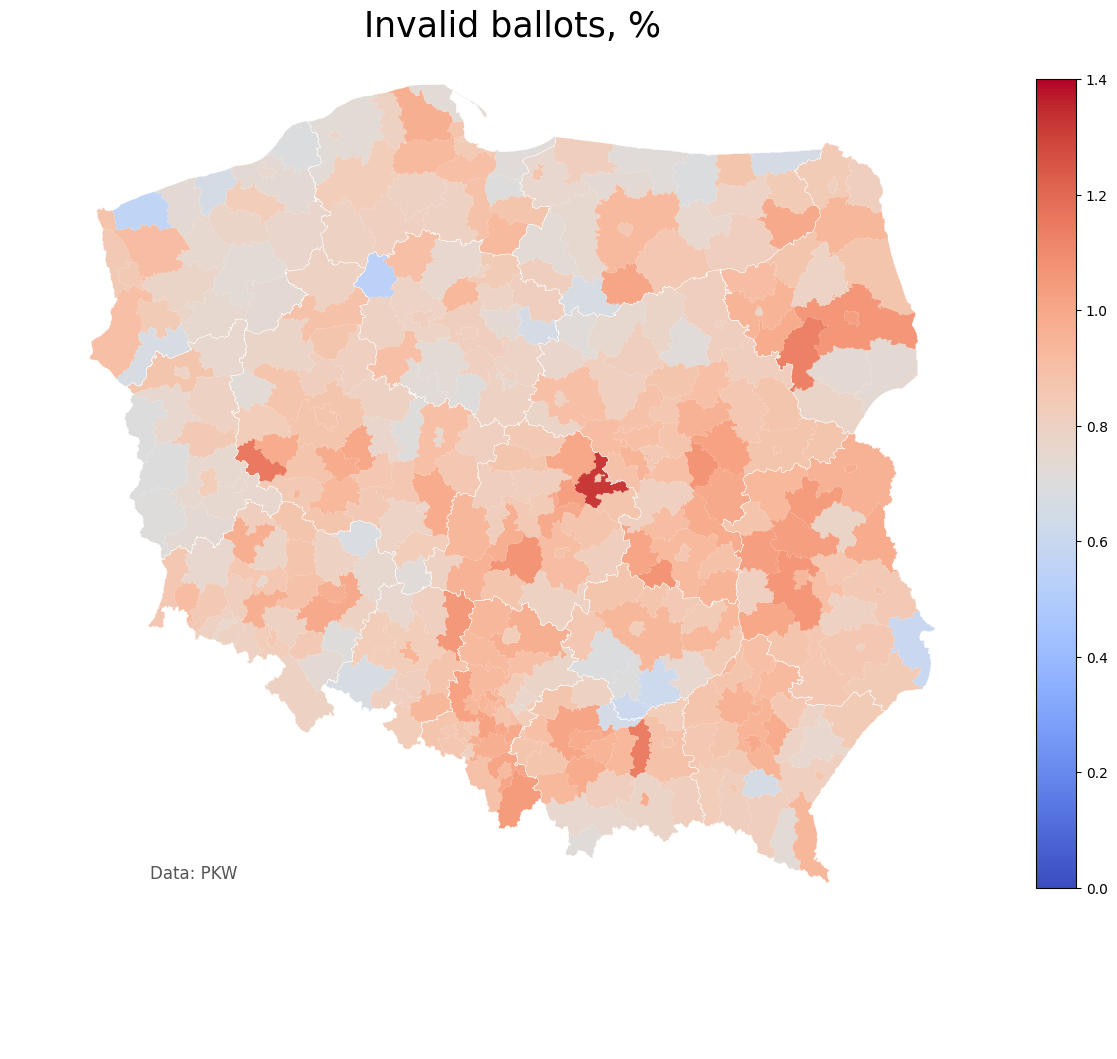

In [11]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Invalid ballots, %", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
vmax = float(df['% głosów nieważnych'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm",
                           norm=plt.Normalize(vmin=0,vmax=1.4))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="% głosów nieważnych", cmap="coolwarm", linewidth=0.1, ax=ax, vmin=0, vmax=1.4);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Invalid ballots 2nd round", dpi=200, bbox_inches='tight')

Województwo,Powiat,Andrzej Sebastian DUDA
lubelskie,janowski,84.21
podkarpackie,brzozowski,82.24
podkarpackie,ropczycko-sędziszowski,81.05


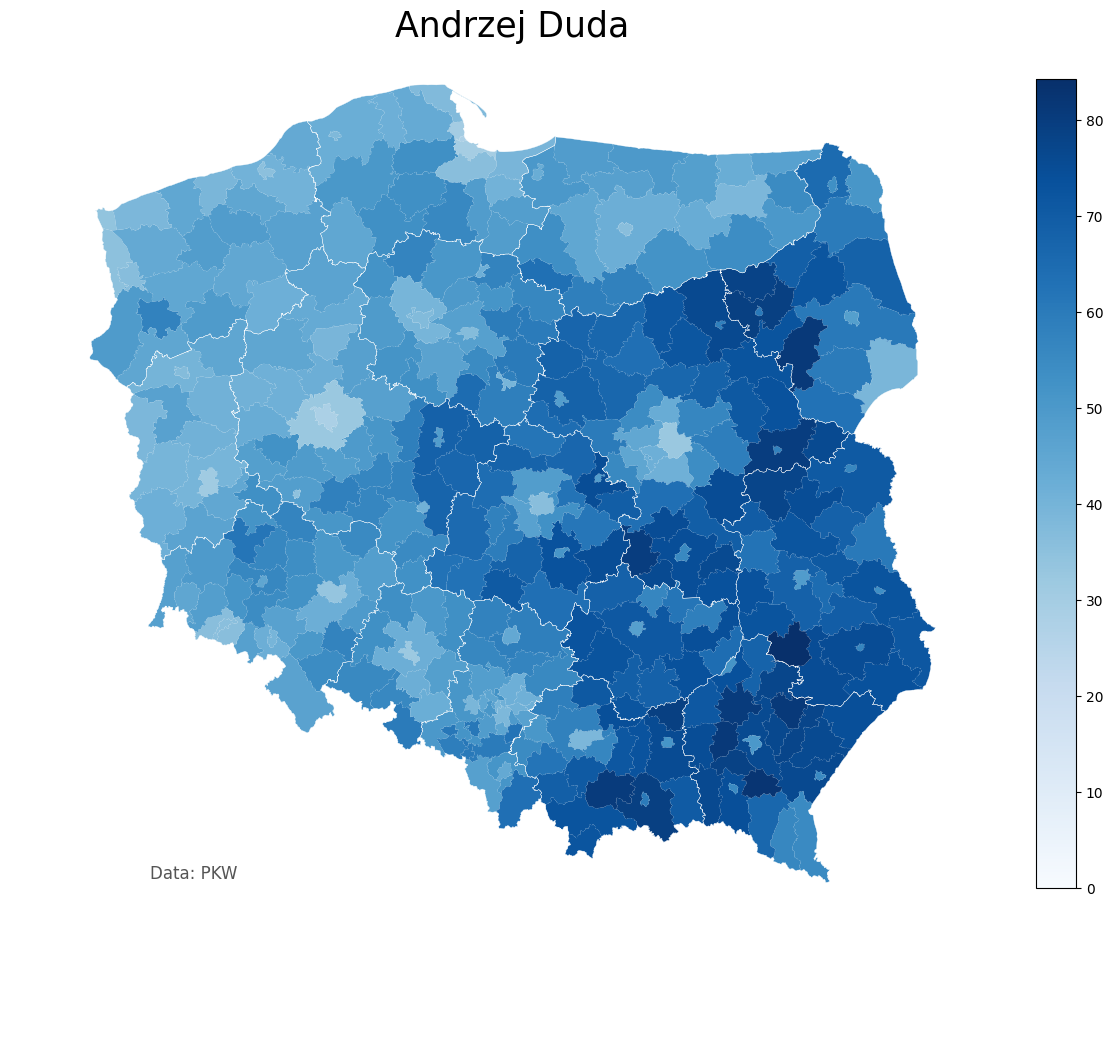

In [12]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Andrzej Duda", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
vmax = float(df['Andrzej Sebastian DUDA'].max())
display(HTML(df.nlargest(3, "Andrzej Sebastian DUDA")
             .to_html(columns=['Województwo', 'Powiat', 'Andrzej Sebastian DUDA'], index=False)))
sm = plt.cm.ScalarMappable(cmap="Blues",
                           norm=plt.Normalize(vmin=0,vmax=vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Andrzej Sebastian DUDA", cmap="Blues", linewidth=0.1, ax=ax, vmin=0, vmax=vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Duda 2nd round", dpi=200, bbox_inches='tight')

Województwo,Powiat,Rafał Kazimierz TRZASKOWSKI
pomorskie,Sopot,72.16
wielkopolskie,Poznań,71.94
pomorskie,Gdańsk,70.18


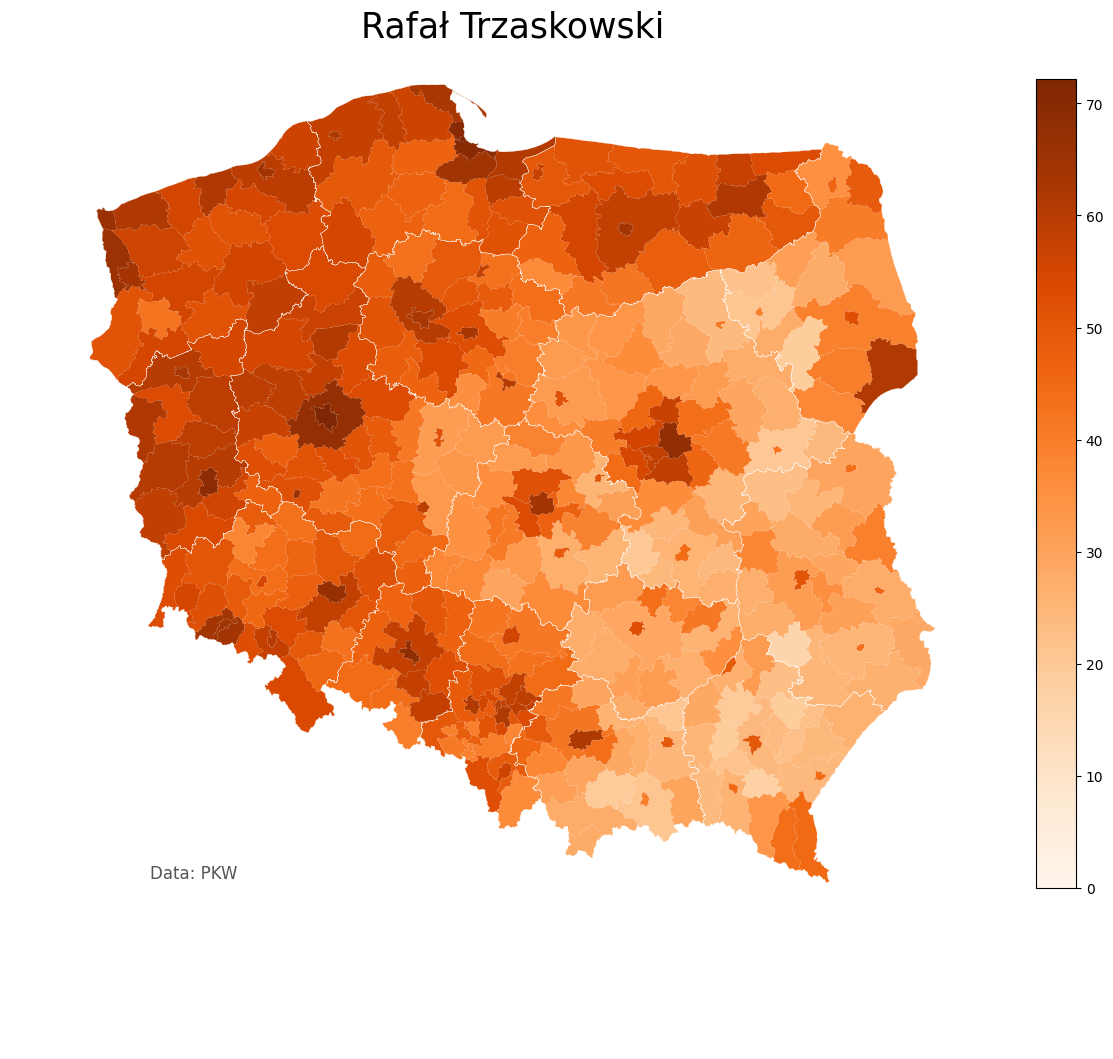

In [13]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Rafał Trzaskowski", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
vmax = float(df['Rafał Kazimierz TRZASKOWSKI'].max())
display(HTML(df.nlargest(3, "Rafał Kazimierz TRZASKOWSKI")
             .to_html(columns=['Województwo', 'Powiat', 'Rafał Kazimierz TRZASKOWSKI'], index=False)))
sm = plt.cm.ScalarMappable(cmap="Oranges",
                           norm=plt.Normalize(vmin=0,vmax=vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Rafał Kazimierz TRZASKOWSKI", cmap="Oranges", linewidth=.1, ax=ax, vmin=0, vmax=vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Trzaskowski 2nd round", dpi=200, bbox_inches='tight')

In [14]:
def winning_candidate(row):
    if row["Rafał Kazimierz TRZASKOWSKI"] > row["Andrzej Sebastian DUDA"]:
        return "Rafał Kazimierz TRZASKOWSKI"
    else: return "Andrzej Sebastian DUDA"
    
merged_df["WINNING_CANDIDATE"] = merged_df.apply(lambda row: winning_candidate(row), axis=1)

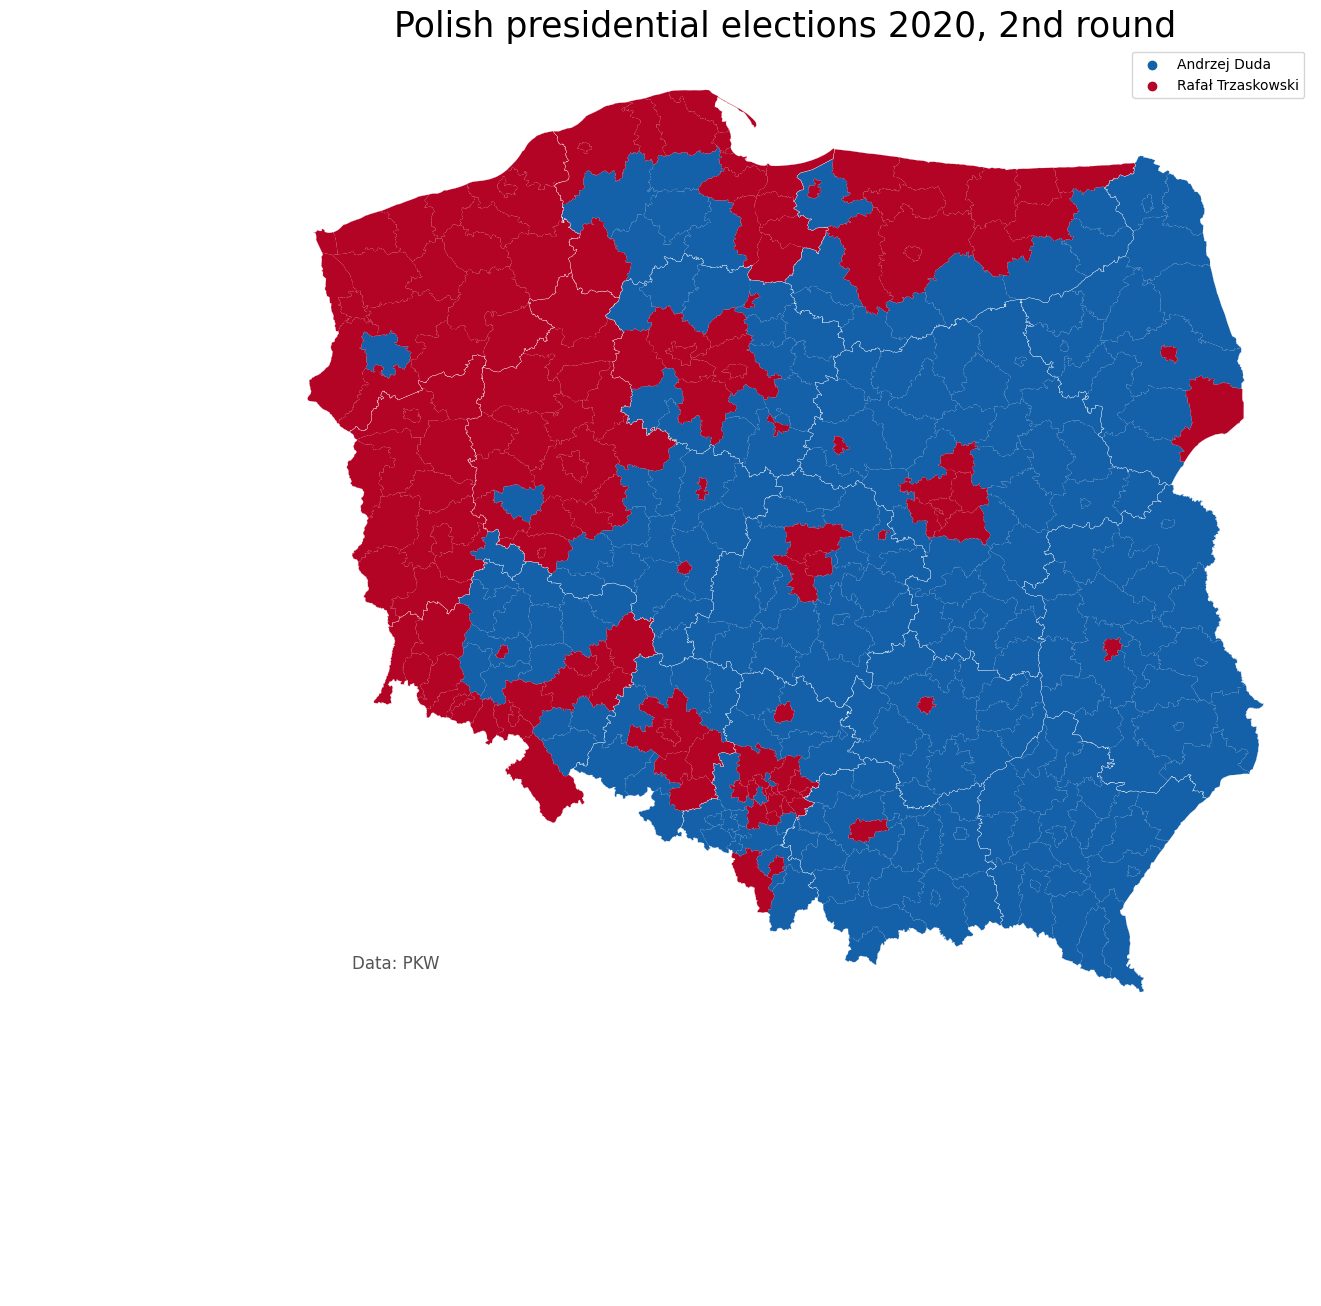

In [15]:
candidates = {"Andrzej Sebastian DUDA": '#1561A9',
           "Rafał Kazimierz TRZASKOWSKI": '#B40426'}

fig, ax = plt.subplots(1, figsize=(22, 22))
ax.set_title("Polish presidential elections 2020, 2nd round", fontdict={"fontsize": "25", "fontweight" : "3"})
divider = make_axes_locatable(ax)
ax.axis("off")
ax.annotate("Data: PKW",xy=(.16, .16),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")

for candidate, color in candidates.items():
    merged_df[merged_df.WINNING_CANDIDATE==candidate].plot(linewidth=.0,
                                                           color=color, ax=ax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.15);
cmap = ListedColormap(['#1561A9', '#B40426'])
lbls = ["Andrzej Duda", "Rafał Trzaskowski"]
[ax.scatter([], [], color=cmap(i), label=lbls[i]) for i in range(2)]
ax.legend();
plt.savefig("Elections2020", dpi=200, bbox_inches='tight')